In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import *
import pandas as pd

tf.reset_default_graph() #This will ensure that the variables get the names you intended, but it will invalidate previously-created graphs


In [2]:
# cd /Users/Nevaeh/PythonCSCourse/XcodePython/FindCell2/Step2_MyNet/

In [3]:
cd /Users/Nevaeh/DataInOut/FindPerfect_speed/My_Net_15a/

/Users/Nevaeh/DataInOut/FindPerfect_speed/My_Net_15a


In [4]:
# cd /Users/Nevaeh/DataInOut/Finished/My_Net_9_1/

In [5]:
import os
if os.path.exists('my_net/') is False:
    os.makedirs('my_net/')

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import RHX_Input
import RHX_Network
import RHX_Transformation

###--------------------------------------------------------------###
'''            --     Part 1: Loading  images    --              '''

My_Data = RHX_Input.LoadImage(directory='../Step1_DataPreparation/D2_CSV_data',Filename='prediction',LabelSize=1) # Get location
My_Data.RandomLoad()  # Load data

InputSize  = My_Data.InputSize  # Get InputSize
OutputSize = My_Data.OutputSize # Get OutputSize

###---------------------------------------------------------------###


###---------------------------------------------------------------###
'''            --     Part 2: define  placeholder    --           '''

with tf.name_scope('inputs'):
    xs          = tf.placeholder(tf.float32, [None,InputSize*InputSize],   name = 'x_input')
    ys          = tf.placeholder(tf.float32, [None,OutputSize*OutputSize], name = 'y_input')

    keep_prob   = tf.placeholder(tf.float32, name ='Dropout')
    
    tst         = tf.placeholder(tf.bool)    # test flag for batch norm
    iter        = tf.placeholder(tf.int32)

    is_training = tf.placeholder(tf.float32, name='is_training')

###-- -------------------------------------------------- --###



###---------------------------------------------------------------###
'''     --     Part 3:  get prediction from network    --         '''

IMAGE_x_SIZE = InputSize
IMAGE_y_SIZE = OutputSize

#x_image,y_image = RHX_Transformation.inputs(xs,ys,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)
x_image,y_image = RHX_Transformation.distorted_inputs(xs,ys,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)


prediction = RHX_Network.inference(x_image,IMAGE_x_SIZE)


###-- ---------------------------------------- --###
###-- Part 4: Define Cost and accuracy : start --###

with tf.name_scope('loss'):
    prediction = tf.reshape(prediction, [IMAGE_x_SIZE,IMAGE_x_SIZE])
    x_image    = tf.reshape(x_image,    [IMAGE_x_SIZE,IMAGE_x_SIZE])
    y_image    = tf.reshape(y_image,    [IMAGE_y_SIZE,IMAGE_y_SIZE])


#     loss    =  tf.reduce_mean(tf.pow(x_image - prediction, 2))*1e4
    loss    =  tf.reduce_mean(tf.pow(y_image - prediction, 2))*1e4

    #    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=x_image)
    #    loss = tf.reduce_mean(cross_entropy)*100
    tf.scalar_summary('loss',loss)

with tf.name_scope('train'):
    #    train_step  = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    #     train_step  = tf.train.MomentumOptimizer(0.1,0.1).minimize(loss)
    train_step  = tf.train.AdamOptimizer(1e-3).minimize(loss)
    #     train_step  = tf.train.AdagradOptimizer(0.1).minimize(loss)
    #     train_step  = tf.train.RMSPropOptimizer(0.1).minimize(loss)

with tf.name_scope('Train_accuracy'):
    accuracy = 1-loss
    tf.scalar_summary('accuracy',accuracy)


init   = tf.initialize_all_variables()
sess   = tf.Session()


### initstate = 0 means use history parameters number
### initstate = 1 means random initialization

initstate  = 0

if initstate is 1:
    sess.run(init)
else:
    saver = tf.train.Saver()
    saver.restore(sess,"my_net/save_net.ckpt")


merge  = tf.merge_all_summaries()
train_writer = tf.train.SummaryWriter("logs/CNN_train",sess.graph)
test_writer  = tf.train.SummaryWriter("logs/CNN_test")

###-- Part 4: Define Cost and accuracy : end --###
###-- -------------------------------------- --###




Loading ... 
Loading done! time:  9.32963395119


In [7]:
print "Done!"

Done!


In [8]:
# for i in range(500):
#     x_data, y_data = My_Data.Batch_train(1)  #load training data
    
#     sess.run(train_step,feed_dict={xs:x_data,ys:y_data, keep_prob: 1,is_training: 1,tst: True,iter: i})
    

## ` Part 1. original pic, label, prediction`

In [9]:
def Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE):
    print "Autoencoder!"
    plt.figure(1,figsize=(15,8))
    mycmap = cm.get_cmap('gray')
    plt.subplot(1,3,1)
    plt.imshow(X_flip.reshape([IMAGE_x_SIZE,IMAGE_x_SIZE]).T,cmap=mycmap)
    plt.title('Input')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(Predict_data.reshape([IMAGE_x_SIZE,IMAGE_x_SIZE]).T,cmap=mycmap)
    plt.title('Prediction')
    plt.axis('off')


#     plt.subplot(1,3,3)
#     plt.imshow(x_data_test.reshape([InputSize,InputSize]),cmap=mycmap)
#     plt.title('Original')
    
def Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE):
    print "Segmentation!"
    plt.figure(1,figsize=(15,8))
    mycmap = cm.get_cmap('gray')
    plt.subplot(2,3,1)
    plt.imshow(X_flip.reshape([IMAGE_x_SIZE,IMAGE_x_SIZE]).T,cmap=mycmap)
    plt.title('Input')
    plt.axis('off')


    plt.subplot(2,3,2)
    plt.imshow(Y_flip.reshape([IMAGE_y_SIZE,IMAGE_y_SIZE]).T,cmap=mycmap)
    plt.title('Ground Truth')
    plt.axis('off')


    plt.subplot(2,3,3)
    plt.imshow(Predict_data.reshape([IMAGE_x_SIZE,IMAGE_x_SIZE]).T,cmap=mycmap)
    plt.title('Prediction')
    plt.axis('off')


#     plt.subplot(2,3,4)
#     plt.imshow(x_data_test.reshape([InputSize,InputSize]),cmap=mycmap)
#     plt.subplot(2,3,5)
#     plt.imshow(y_data_test.reshape([IMAGE_y_SIZE,IMAGE_y_SIZE]),cmap=mycmap)    

412.527
Segmentation!


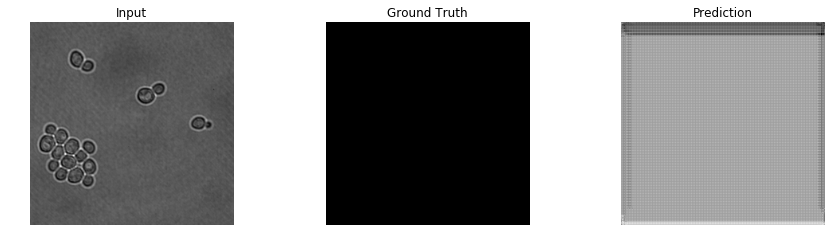

In [10]:
x_data_test, y_data_test = My_Data.Batch_train(1)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

117.269
Segmentation!


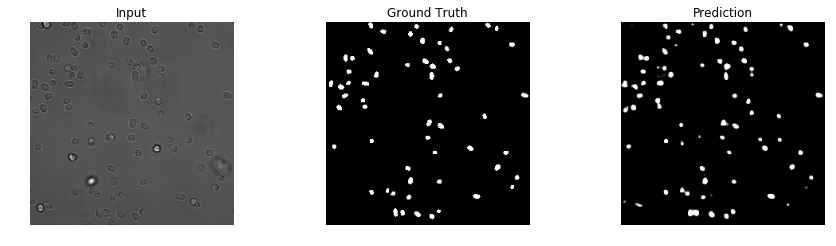

In [11]:
x_data_test, y_data_test = My_Data.Batch_Prediction(1)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

209.409
Segmentation!


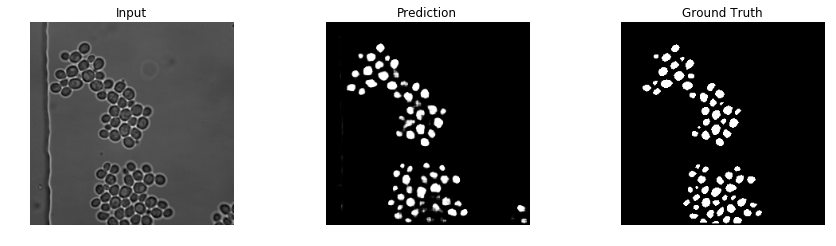

In [12]:
x_data_test, y_data_test = My_Data.Batch_Prediction(4)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

8442.93
Segmentation!


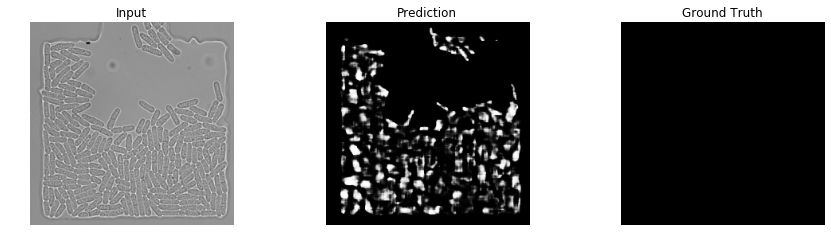

In [13]:
x_data_test, y_data_test = My_Data.Batch_Prediction(17)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

9899.18
Segmentation!


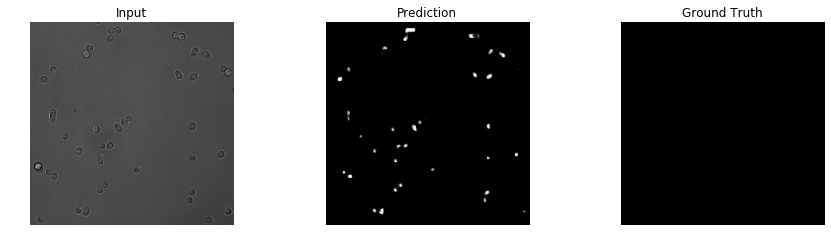

In [14]:
x_data_test, y_data_test = My_Data.Batch_Prediction(19)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

8660.57
Segmentation!


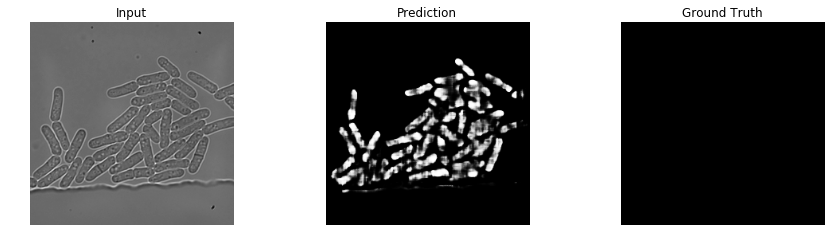

In [15]:
x_data_test, y_data_test = My_Data.Batch_Prediction(21)

Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

print str(sess.run(loss, feed_dict={xs: x_data_test, ys: y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1}))

# Performance_Autoencoder(x_data_test,X_flip,Predict_data,InputSize,IMAGE_x_SIZE)
Performance(x_data_test,y_data_test,X_flip,Y_flip,Predict_data,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)

In [35]:
My_Data.RandomLoad()  # Load data

Loading ... 
Loading done! time:  49.0772280693


In [17]:
# Combine Prediction and Input
Output = pd.DataFrame(np.concatenate([Predict_data.reshape([-1]),X_flip.reshape([-1])]))

# Write it into csv
Output.to_csv('/Users/Nevaeh/PythonCSCourse/XcodePython/FindCell2/Step3_Performance/prediction.csv',index=None)
print "Result has been writen into csv files !"

Result has been writen into csv files !


In [123]:
Input=pd.read_csv('/Users/Nevaeh/PythonCSCourse/XcodePython/FindCell2/matlab/ImageProcessing/out.csv',',')

### ` every 100 epohs test same input`

In [11]:

###-- -------------------------------------- --###
###--      Part 5: Moniter Gif : start       --###

def Collection(Predict_data,X_flip,Output):
    Temp   = pd.DataFrame(np.concatenate([Predict_data.reshape([-1]),X_flip.reshape([-1])])).T
    Output = pd.concat([Output,Temp])
    Output.T.to_csv('out.csv',index=None)
    print "Result has been writen into csv files !"
    return Output

In [18]:

# predict same picture
x_temp, y_temp = My_Data.Batch_train(1)  #load training data

# init Output
Output = pd.DataFrame(np.concatenate([y_temp.reshape([-1]),x_temp.reshape([-1])])).T



In [20]:
# predict same picture
Predict_data,X_flip,Y_flip = sess.run([prediction,x_image,y_image], feed_dict={xs: x_temp, ys: y_temp, keep_prob: 1,is_training: 1,tst: False,iter: 1})
# write into csv
Output = Collection(Predict_data,X_flip,Output)


In [24]:
Output = pd.concat([Output,Temp])



In [25]:

Output.T.to_csv('out.csv',index=None)
print "Result has been writen into csv files !"

###--      Part 5: Moniter Gif : End         --###
###-- -------------------------------------- --###



Result has been writen into csv files !


SyntaxError: 'return' outside function (<ipython-input-25-42ac69f63d50>, line 4)

In [19]:
distorted_image = tf.cast(tf.reshape(xs, [-1,InputSize,InputSize,1]), tf.float32)



In [20]:
height = InputSize
width  = InputSize

In [21]:
distorted_image = tf.random_crop(distorted_image, [height, width,1])



ValueError: Incompatible shapes for broadcasting: (4,) and (3,)

In [14]:

# distorted_image = tf.image.random_saturation(reshaped_image, [height, width,1])
distorted_image = tf.random_crop(distorted_image, [height, width,1])

# Randomly flip the image horizontally.
# distorted_image = tf.image.random_flip_left_right(distorted_image)
distorted_image = tf.image.random_flip_left_right(distorted_image)
distorted_image = tf.image.random_flip_up_down(distorted_image)


# # Because these operations are not commutative, consider randomizing
# # randomize the order their operation.
distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
distorted_image = tf.image.random_contrast(distorted_image,
                                         lower=0.2, upper=1.8)


NameError: name 'distorted_image' is not defined

In [126]:
x_data_test, y_data_test = My_Train.Batch_test(1)
Distorure = sess.run(distorted_image,feed_dict={xs:x_data_test})

NameError: name 'My_Train' is not defined

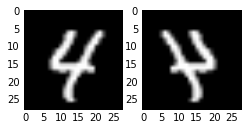

In [166]:
mycmap = cm.get_cmap('gray')


plt.subplot(1,3,1)
plt.imshow(x_data_test.reshape([InputSize,InputSize]),cmap=mycmap)
plt.subplot(1,3,2)
plt.imshow(Distorure.reshape([InputSize,InputSize]),cmap=mycmap)



In [56]:
# def distorted_inputs(xs,ys,InputSize,OutputSize,IMAGE_x_SIZE,IMAGE_y_SIZE)
#     """Construct distorted input for training.

#     Args:
#         xs: Images. 1D tensor of [Batchsize*InputSize*InputSize*1].
#         ys: Labels. 1D tensor of [Batchsize*InputSize*InputSize*1].

#     Returns:
#         images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 1] size.
#         labels: Labels. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 1] size.
#     """

distorted_image = tf.cast(tf.reshape(xs, [InputSize,InputSize,1]), tf.float32)

# distorted_image = tf.image.random_saturation(reshaped_image, [InputSize, InputSize,1])
distorted_image = tf.random_crop(distorted_image, [14, 14,1],seed=2)

# Randomly flip the image horizontally.
# distorted_image = tf.image.random_flip_left_right(distorted_image)
# distorted_image = tf.image.random_flip_up_down(distorted_image)

Distorure = sess.run(distorted_image,feed_dict={xs:x_data_test})

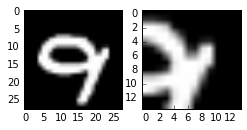

In [52]:
mycmap = cm.get_cmap('gray')


plt.subplot(1,3,1)
plt.imshow(x_data_test.reshape([InputSize,InputSize]),cmap=mycmap)
plt.subplot(1,3,2)
plt.imshow(Distorure.reshape([14,14]),cmap=mycmap)




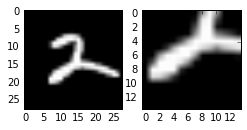

In [70]:
x_data_test, y_data_test = My_Train.Batch_test(1)
Distorure = sess.run(distorted_image,feed_dict={xs:x_data_test})

mycmap = cm.get_cmap('gray')

plt.subplot(1,3,1)
plt.imshow(x_data_test.reshape([InputSize,InputSize]),cmap=mycmap)
plt.subplot(1,3,2)
plt.imshow(Distorure.reshape([14,14]),cmap=mycmap)


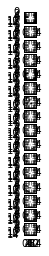

In [222]:
h = sess.run(h_conv1,feed_dict={xs:x_data_test,ys:y_data_test, keep_prob: 1,is_training: 1,tst: False,iter: 1})

mycmap = cm.get_cmap('gray')


for i in np.arange(0,h.shape[-1]):
    
    Temp = h[:,:,:,i].reshape(h.shape[1:3])

    plt.subplot(h.shape[-1],1,i+1)
    plt.imshow(Temp, cmap=mycmap)

### ` Part 2. Best Performance pic, label, prediction`

### ` Part 3. Worse Performance pic, label, prediction`